In [29]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_profiling import ProfileReport

%matplotlib inline

In [24]:
data_movies = pd.read_csv('./Data_IMDB_justMovies/data_movies_clean.csv')
data_ratings = pd.read_csv('./Data_IMDB_justMovies/data_ratings_clean.csv')

In [25]:
data_movies.head(3)

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,6.1,537,7,7
1,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,5.9,171,4,2
2,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,5.2,420,24,3


In [26]:
data_movies_year = (data_movies.groupby(['year']).agg({'imdb_title_id':'count'}).reset_index())
data_movies_year['country']=data_movies['country']
data_movies_year

,year,imdb_title_id,country
0,1906,1,Australia
1,1911,4,"Germany, Denmark"
2,1912,5,USA
3,1913,13,Italy
4,1914,21,USA
...,...,...,...
105,2015,2903,USA
106,2016,3033,Sweden
107,2017,3106,USA
108,2018,2880,USA


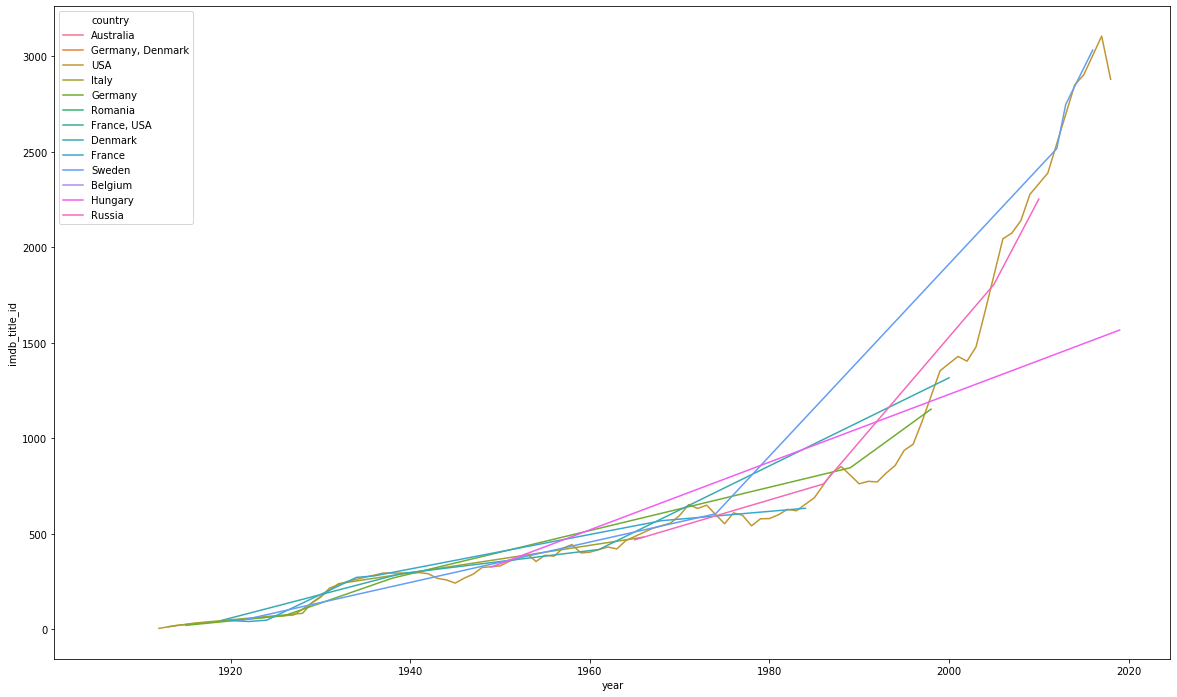

In [32]:
fig, ax = plt.subplots(figsize=(20,12))

sns.lineplot(data=data_movies_year,
            x='year',
            y='imdb_title_id',
            hue='country')

In [33]:
data_movies_year['country'].nunique()

13

In [34]:
data_movies_ratings = pd.merge(data_movies, data_ratings, on='imdb_title_id', how='inner' )

In [35]:
data_movies_ratings['imdb_title_id'].nunique()

81273

In [36]:
data_movies_ratings.columns

Index(['imdb_title_id', 'title', 'year', 'date_published', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics',
       'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_18age_avg_vote',
       'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes',
       'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'u

In [47]:
data_movies_ratings['females_allages_votes']

0         48
1         16
2         39
3        205
4         29
        ... 
81268     17
81269      0
81270      0
81271      0
81272      1
Name: females_allages_votes, Length: 81273, dtype: int64

In [48]:
print(data_movies_ratings['females_allages_votes'].sum())
print(data_movies_ratings['males_allages_votes'].sum())

112141007
493045820


In [49]:
data_movies_ratings['votes'].sum()

765735595

In [50]:
112141007 + 493045820

605186827

In [51]:
data_movies_ratings['top1000_voters_votes'].sum()

6235557

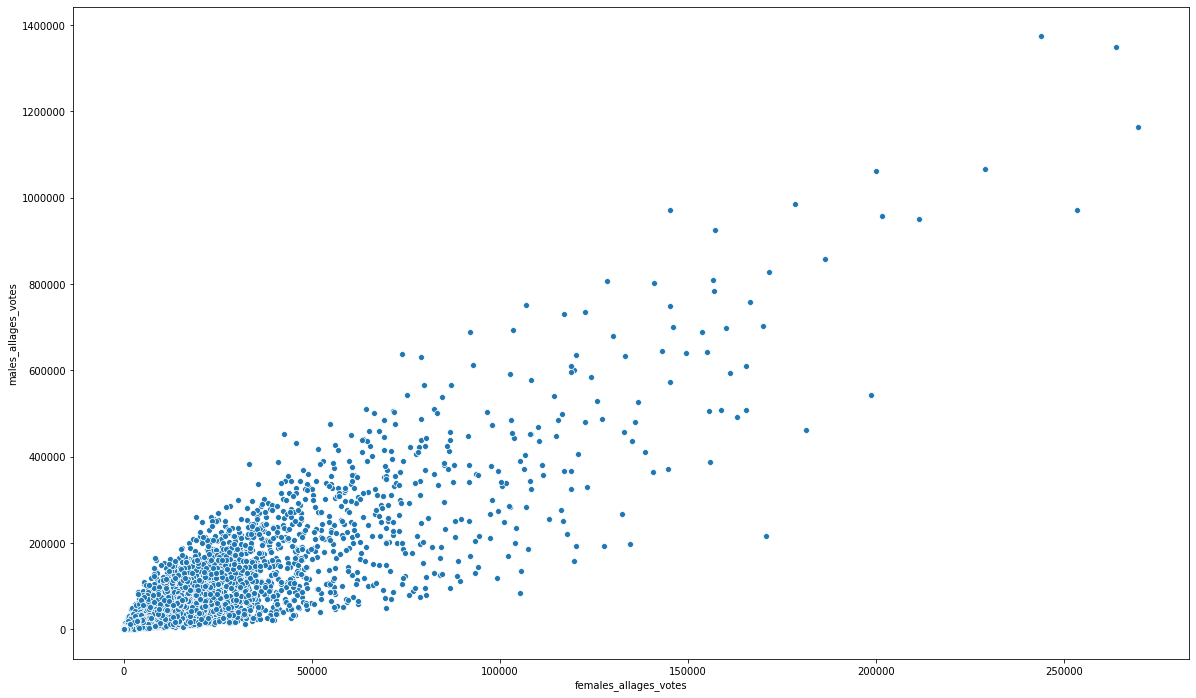

In [54]:
fig, ax = plt.subplots(figsize=(20,12))

sns.scatterplot(data=data_movies_ratings,
            x='females_allages_votes',
            y='males_allages_votes')

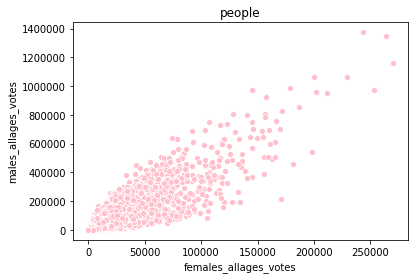

In [63]:
fig, ax = plt.subplots()

ax.set_title('people')
ax.set_xlabel('females_allages_votes')
ax.set_ylabel('males_allages_votes')


sns.scatterplot(data=data_movies_ratings,
            x='females_allages_votes',
            y='males_allages_votes',
            color='pink')

In [64]:
data_movies_ratings.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,...,6.0,19,6.6,14,6.3,64,6.0,89,6.2,309
1,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,5.8,4,6.5,8,5.9,29,6.2,27,6.0,114
2,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,5.5,14,6.2,20,4.9,57,5.5,197,4.7,103
3,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,7.3,74,7.4,75,7.0,126,7.1,452,7.0,1076
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1913-01-01,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,4.8,10,6.5,15,5.7,56,5.9,161,5.7,164


In [65]:
data_genre = (data_movies.groupby(['genre']).agg({'imdb_title_id':'count'}).reset_index())
data_genre['female']=data_movies_ratings['females_allages_votes']
data_genre['male']=data_movies_ratings['males_allages_votes']
data_genre.dtypes

genre            object
imdb_title_id     int64
female            int64
male              int64
dtype: object

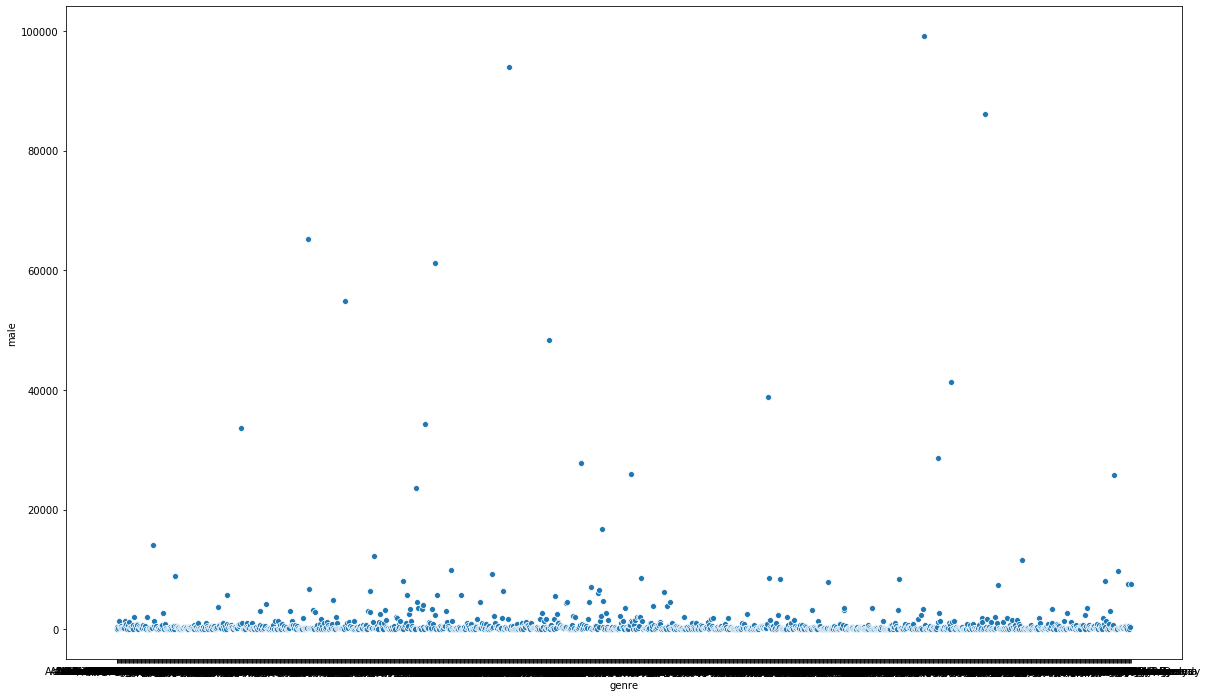

In [66]:
fig, ax = plt.subplots(figsize=(20,12))

sns.scatterplot(data=data_genre,
            x='genre',
            y='male')

In [67]:
data_genre = (data_genre['genre'].str.split(',', expand=True)).copy()
data_genre

,0,1,2
0,Action,None,None
1,Action,Adventure,None
2,Action,Adventure,Biography
3,Action,Adventure,Comedy
4,Action,Adventure,Crime
...,...,...,...
1259,Western,Comedy,None
1260,Western,Comedy,Drama
1261,Western,Drama,None
1262,Western,Family,None


In [88]:
data_genre['movie_title']=data_movies_ratings['title']

#drama_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('Drama', case=False)]

In [105]:
data_genre[data_genre[0].str.match('Animation')].count()[0]

101

In [116]:
genres_movies = ['Drama', 'Horror', 'Sci-Fi', 'Romance', 'Action', 'Thriller', 'Crime', 'Mystery', 'Animation', 'Adventure', 'Fantasy', 'Western', 'Adult', 'Biography', 'Documentary', 'Family', 'Film-Noir', 'History', 'Music', 'Musical', 'War']

for x in genres_movies:
    count_genre = data_genre[data_genre[0].str.match(x)].count()[0]
    print(x, count_genre)

Drama 165
Horror 54
Sci-Fi 26
Romance 33
Action 162
Thriller 23
Crime 84
Mystery 36
Animation 101
Adventure 149
Fantasy 51
Western 12
Adult 2
Biography 55
Documentary 1
Family 67
Film-Noir 8
History 17
Music 56
Musical 41
War 10


In [113]:
data_genre[0].unique()

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], dtype=object)

In [112]:
data_genre[0]

0        Action
1        Action
2        Action
3        Action
4        Action
         ...   
1259    Western
1260    Western
1261    Western
1262    Western
1263    Western
Name: 0, Length: 1264, dtype: object

In [ ]:
data_genre.isnull().sum()

In [ ]:
data_movies_ratings.columns

In [ ]:
data_movies_ratings['genre'].head(30)

In [ ]:
data_movies_ratings = data_movies_ratings.to_csv('data_movies_ratings.csv')

In [ ]:
data_movies_ratings = pd.read_csv('data_movies_ratings.csv')

In [ ]:
data_movies_ratings
         

In [ ]:
data_movies_ratings['country'].nunique()

In [ ]:
data_movies_ratings['genre']

In [ ]:
drama_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('Drama', case=False)]
horror_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('Horror', case=False)]
scifi_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('Sci-Fi', case=False)]
romance_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('Romance', case=False)]
action_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('Action', case=False)]
thriller_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('Thriller', case=False)]
mystery_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('Mystery', case=False)]
crime_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('crime', case=False)]
animation_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('animation', case=False)]
adventure_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('adventure', case=False)]
fantasy_movies_ratings = data_movies_ratings[data_movies_ratings.genre.str.contains('fantasy', case=False)]

In [ ]:
crime_drama = data_movies_ratings[data_movies_ratings.genre.str.contains('Crime, Drama', case=False)]
drama_romance = data_movies_ratings[data_movies_ratings.genre.str.contains('Drama, Romance', case=False)]
comedy_romance = data_movies_ratings[data_movies_ratings.genre.str.contains('comedy, romance', case=False)]
thriller_horror = data_movies_ratings[data_movies_ratings.genre.str.contains('thriller, horror', case=False)]


In [ ]:
data_movies_ratings['genre'].head(70)

In [ ]:
fantasy_grouped_year = fantasy_movies_ratings.groupby('year').agg({'country':'count'}).reset_index()
fantasy_grouped_year.dtypes

In [46]:
sns.lineplot(data=fantasy_grouped_year,
            x='year',
            y='country')

NameError: name 'fantasy_grouped_year' is not defined